##RESNET50 balanceado sem DA
##50 EPOCAS E 64 BATCH SIZE E IMAGE SIZE 224

In [6]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pathlib


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D # Updated import statements
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers
from keras import metrics

In [16]:
train_dir = pathlib.Path("/content/drive/MyDrive/DATASET/Dataset_balanced/ds_train")
test_dir = pathlib.Path("/content/drive/MyDrive/DATASET/Dataset_balanced/ds_test")
print(train_dir)
print(test_dir)

/content/drive/MyDrive/DATASET/Dataset_balanced/ds_train
/content/drive/MyDrive/DATASET/Dataset_balanced/ds_test


In [ ]:
#resnet50

In [19]:
# Definindo variáveis de tamanho e batch size
resnet50_img_size = 224
resnet50_batch_size = 64

# Criando dataset de treino com validação de 10% do total
resnet50_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(resnet50_img_size, resnet50_img_size),
    batch_size=resnet50_batch_size)

# Criando dataset de validação
resnet50_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(resnet50_img_size, resnet50_img_size),
    batch_size=resnet50_batch_size)

# Criando dataset de teste
resnet50_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(resnet50_img_size, resnet50_img_size),
    batch_size=resnet50_batch_size)

# Obtendo as classes diretamente dos datasets criados
classes_train = resnet50_train_ds.class_names
classes_val = resnet50_val_ds.class_names
class_names = resnet50_test_ds.class_names

# Imprimindo para verificação
print(f"Classes de treino: {classes_train}")
print(f"Classes de validação: {classes_val}")
print(f"Classes de teste: {class_names}")


Found 5855 files belonging to 5 classes.
Using 5270 files for training.
Found 5855 files belonging to 5 classes.
Using 585 files for validation.
Found 650 files belonging to 5 classes.
Classes de treino: ['basal_cell_carcinoma', 'melanoma', 'nevus', 'seborrheic_keratosis', 'squamous_cell_carcinoma']
Classes de validação: ['basal_cell_carcinoma', 'melanoma', 'nevus', 'seborrheic_keratosis', 'squamous_cell_carcinoma']
Classes de teste: ['basal_cell_carcinoma', 'melanoma', 'nevus', 'seborrheic_keratosis', 'squamous_cell_carcinoma']


In [20]:
for image_batch, labels_batch in resnet50_train_ds:
  resnet50_train_img = image_batch
  resnet50_train_labels = labels_batch
  break
for image_batch, labels_batch in resnet50_val_ds:
  resnet50_val_img = image_batch
  resnet50_val_labels = labels_batch
  break
for image_batch, labels_batch in resnet50_test_ds:
  resnet50_test_img = image_batch
  resnet50_test_labels = labels_batch
  break

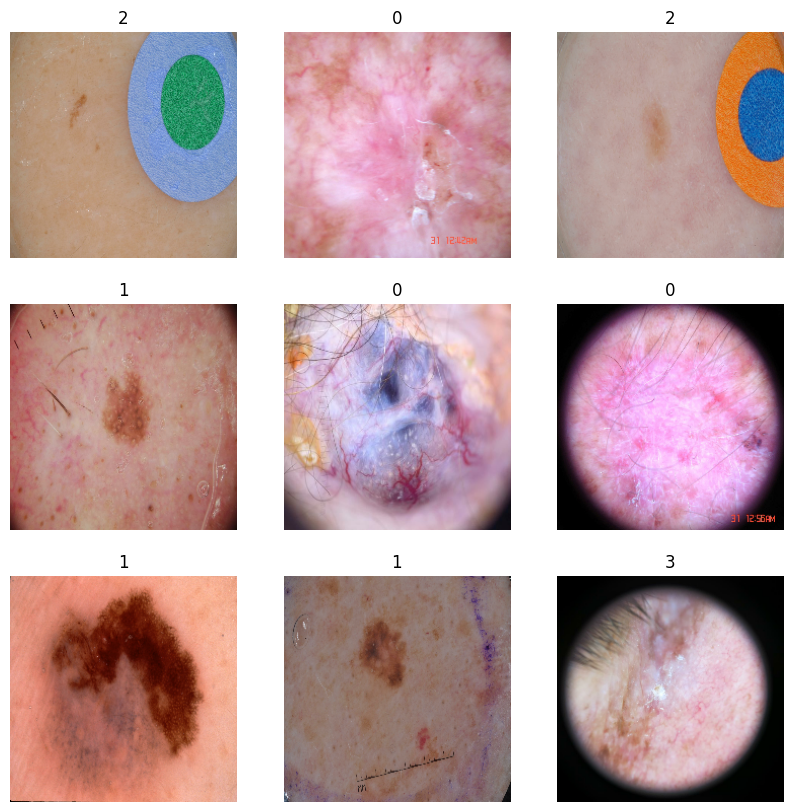

In [21]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(resnet50_train_img[i].numpy().astype("uint8"))
    plt.title(int(resnet50_train_labels[i]))
    plt.axis("off")

In [22]:
AUTOTUNE = tf.data.AUTOTUNE

resnet50_train_ds = resnet50_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
resnet50_val_ds = resnet50_val_ds.cache().prefetch(buffer_size=AUTOTUNE)
resnet50_test_ds = resnet50_test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [23]:
#Restnet50
img_shape = (resnet50_img_size,resnet50_img_size,3)
Resnet50_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling='avg'
)
prediction_layer = tf.keras.layers.Dense(5, activation='softmax', bias_regularizer=tf.keras.regularizers.l2(1e-4))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [24]:
resnet50_model = Sequential([
    Resnet50_model,          # Backbone ResNet50
    layers.BatchNormalization(),  # Normalização das ativações antes da camada final
    prediction_layer         # Camada de predição
])

In [25]:
resnet50_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
epochs = 50
history = resnet50_model.fit(
  resnet50_train_ds,
  validation_data=resnet50_val_ds,
  epochs=epochs
)

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 411s 792ms/step - accuracy: 0.5316 - loss: 1.3381 - val_accuracy: 0.3111 - val_loss: 104.7071
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 287ms/step - accuracy: 0.6894 - loss: 0.7946 - val_accuracy: 0.4085 - val_loss: 2.2296
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 286ms/step - accuracy: 0.7756 - loss: 0.5767 - val_accuracy: 0.3863 - val_loss: 1.5749
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 286ms/step - accuracy: 0.8365 - loss: 0.4377 - val_accuracy: 0.4034 - val_loss: 2.1179
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 286ms/step - accuracy: 0.8670 - loss: 0.3666 - val_accuracy: 0.3487 - val_loss: 1.9120
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 287ms/step - accuracy: 0.9142 - loss: 0.2489 - val_accuracy: 0.6274 - val_loss: 0.9677
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 287ms/step - accuracy: 0.9405 - loss: 0.1756 - val_accuracy: 0.4906 - val_loss: 2.1608
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 286ms/step - accuracy: 0.9614 - loss: 0.1336 - val_a

In [27]:
resnet50_loss, resnet50_acc = resnet50_model.evaluate(resnet50_test_ds)


11/11 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.4167 - loss: 4.3719


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

Relatório de Classificação:

                         precision    recall  f1-score   support

   basal_cell_carcinoma       0.49      0.71      0.58       130
               melanoma       0.35      0.40      0.37       130
                  nevus       0.59      0.50      0.54       130
   seborrheic_keratosis       0.39      0.41      0.40       130
squamous_cell_carcinoma       0.45      0.22      0.30       130

               accuracy                           0.45       650
              macro avg       0.45      0.45      0.44       650
           weighted avg       0.

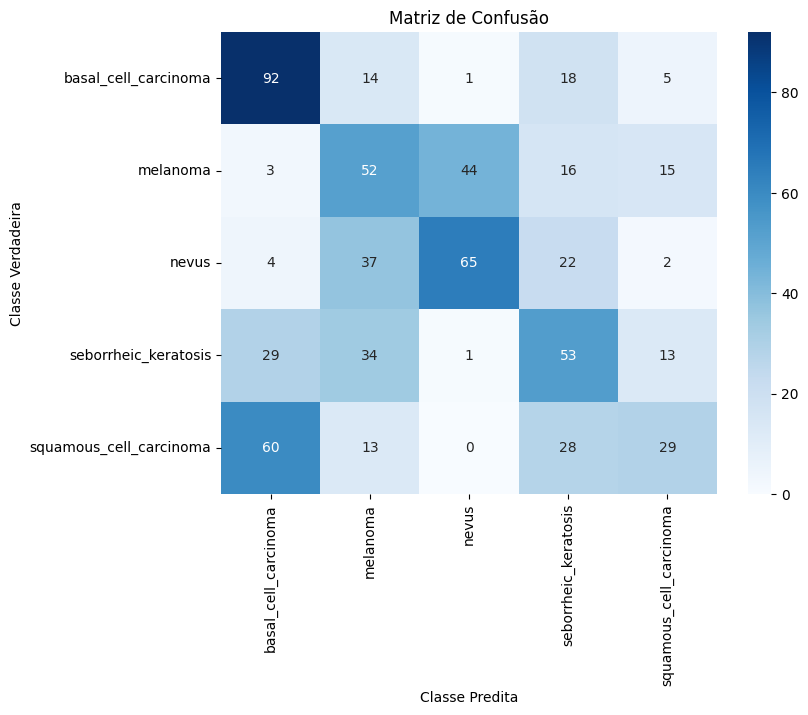

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = []  # Lista para armazenar previsões
y_true = []  # Lista para armazenar os rótulos verdadeiros

# Passar por todos os batches do conjunto de teste
for images, labels in resnet50_test_ds:
    # Gerar previsões
    preds = resnet50_model.predict(images)
    # Armazenar as previsões
    y_pred.extend(np.argmax(preds, axis=1))  # Armazenar o índice da classe predita
    y_true.extend(labels.numpy())  # Armazenar diretamente os índices das classes verdadeiras

# Converter para arrays numpy
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# 3. Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred)

# 4. Imprimir o classification report
print("\nRelatório de Classificação:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# 5. Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()